Домашнее задание 
===

Данные
----
Данные содержат информацию о продажах автомобилей в месяц. 

Задание
--
* Построить модель предсказаний, используя библиотеку Propeht. 
* Сделать предсказание на год вперед (12 месяцев)
* При постоении модели использовать кросс-валидацию

In [2]:
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from sklearn.metrics import mean_absolute_error, r2_score
#dataset
import pandas as pd
import numpy as np
df = pd.read_csv('../datatest/monthly-car-sales.csv')
df


,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [3]:
df.set_index(pd.to_datetime(df['Month']),
            inplace=True)

df.rename(columns = {'Month': 'ds',
                    'Sales': 'y'},
         inplace=True)

metrics_result_table = pd.DataFrame(columns=['Комментарий',
                                             'MAE']) # сюда буду складывать результаты


df

,ds,y
Month,,
1960-01-01,1960-01,6550
1960-02-01,1960-02,8728
1960-03-01,1960-03,12026
1960-04-01,1960-04,14395
1960-05-01,1960-05,14587
...,...,...
1968-08-01,1968-08,16722
1968-09-01,1968-09,14385
1968-10-01,1968-10,21342


In [4]:
def modeling (model, picture = False): # создаю сразу функцию, так как однотипных построений будет много 
    m.fit(df)
    future = m.make_future_dataframe(periods=12, freq = "M")
    forecast = m.predict(future)
    cross_valid = cross_validation(m, horizon='365 days')
    metrics = performance_metrics(cross_valid) 
               
    if picture: # рисовать график, если передаем True
        fig = m.plot(forecast)
    
    return metrics.mean()['mae'] 

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Making 10 forecasts with cutoffs between 1963-06-0

  0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anacon

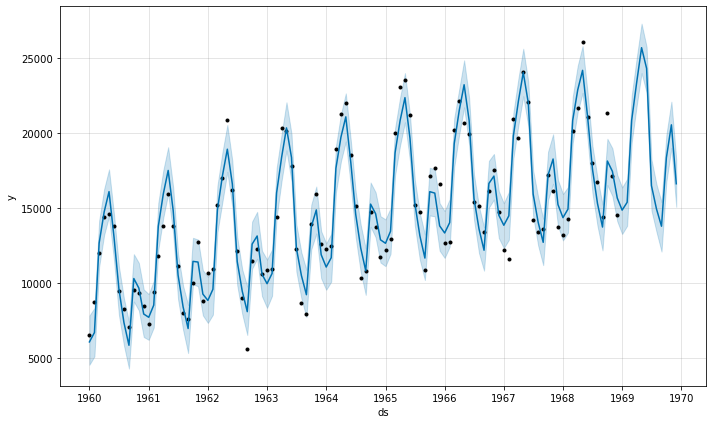

In [5]:
m = Prophet()
a = modeling(m, picture = True)
metrics_result_table.loc[len(metrics_result_table.index)] = ['by default', a]

In [6]:
metrics_result_table

,Комментарий,MAE
0,by default,1572.847054


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Making 10 forecasts with cutoffs between 1963-06-0

  0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\kate\anacon

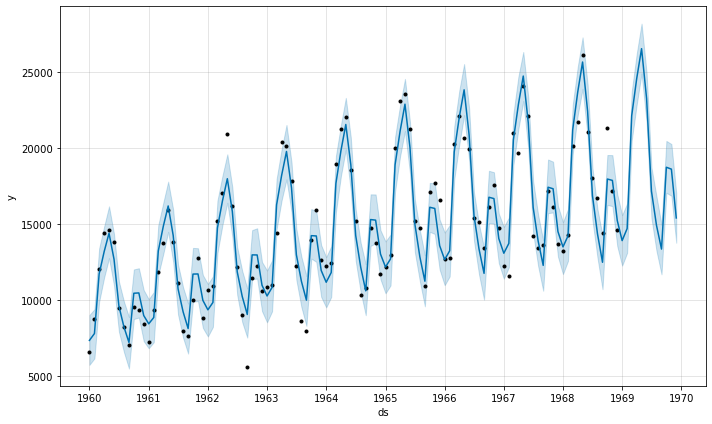

In [7]:
# Пробуем добавить другую операцию для сезонности
m = Prophet(seasonality_mode='multiplicative')

a = modeling(m, picture = True)
metrics_result_table.loc[len(metrics_result_table.index)] = ['multiplicative', a]


In [8]:
metrics_result_table.sort_values(by=['MAE'])

,Комментарий,MAE
0,by default,1572.847054
1,multiplicative,1577.683783


Показатели стали хуже - значит нужно вернуться к аддитивной

In [11]:
# добавим еще одну фичу - среднее за каждый месяц
df['mnth']=df.index.month
avg_vals_mnth = df.groupby('mnth')['y'].mean()
df = df.assign(mnth_avg=df['mnth'].map(avg_vals_mnth))
df

,ds,y,mnth,mnth_avg
Month,,,,
1960-01-01,1960-01,6550,1,10875.888889
1960-02-01,1960-02,8728,2,11563.111111
1960-03-01,1960-03,12026,3,17086.111111
1960-04-01,1960-04,14395,4,19278.222222
1960-05-01,1960-05,14587,5,20883.777778
...,...,...,...,...
1968-08-01,1968-08,16722,8,11578.555556
1968-09-01,1968-09,14385,9,10140.000000
1968-10-01,1968-10,21342,10,14612.444444


In [15]:
m = Prophet(seasonality_mode='additive')
m.add_regressor('mnth_avg') # добавляем новую фичу в модель
m.fit(df)

future = m.make_future_dataframe(periods=12, freq = "M")

#future['mnth_avg'] = future['ds'].apply(mnth_avg)
forecast = m.predict(future)
cross_valid = cross_validation(m, horizon='365 days')
metrics = performance_metrics(cross_valid) 

metrics_result_table.loc[len(metrics_result_table.index)] = ['mnth_avg', metrics.mean()['mae']]


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\kate\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


ValueError: Regressor 'mnth_avg' missing from dataframe

In [ ]:
metrics_result_table.sort_values(by=['MAE'])

Дополнительная фича улучшила метрики. Ура! 

In [ ]:
df['Rolling_by_mnth'] = df.groupby('mnth')['y'].rolling(3, closed = 'left').mean().reset_index(0, drop = True)

df = df.where(pd.notna(df), df['mnth_avg'], axis=0) 
                                                             

In [ ]:
m = Prophet(seasonality_mode='additive')
m.add_regressor('Rolling_by_mnth')
m.add_regressor('mnth_avg')

a = modeling(m)
metrics_result_table.loc[len(metrics_result_table.index)] = ['mnth_avg', a]

metrics_result_table.sort_values(by=['MAE'])
